In [32]:
import sys
import pandas as pd

In [33]:
import os
dataset_path = "dataset"
csv = os.listdir(dataset_path)
csv = [f for f in csv if os.path.isfile(dataset_path + '/' + f) and ".csv" in f]
csv[:5]

['AAL_data.csv',
 'AAPL_data.csv',
 'AAP_data.csv',
 'ABBV_data.csv',
 'ABC_data.csv']

In [34]:
class StockData:
    def __init__(self,stock, path, dataset_path):
        self.csv_path = path
        self.stock =  stock
        self.dataset_path = dataset_path
    def load_df(self):
        df = pd.read_csv(dataset_path + "/" + self.csv_path)
        return df

In [35]:
StockDataList = []
for path in csv:
    stock = path.split("_")[0]
    StockDataList.append(StockData(stock,path,dataset_path))
print(StockDataList[0].stock, StockDataList[0].csv_path)

AAL AAL_data.csv


In [36]:
list_of_df = []
for Stockdata in StockDataList:
    list_of_df.append(Stockdata.load_df())

In [37]:
df = pd.concat(list_of_df)

# Occurence

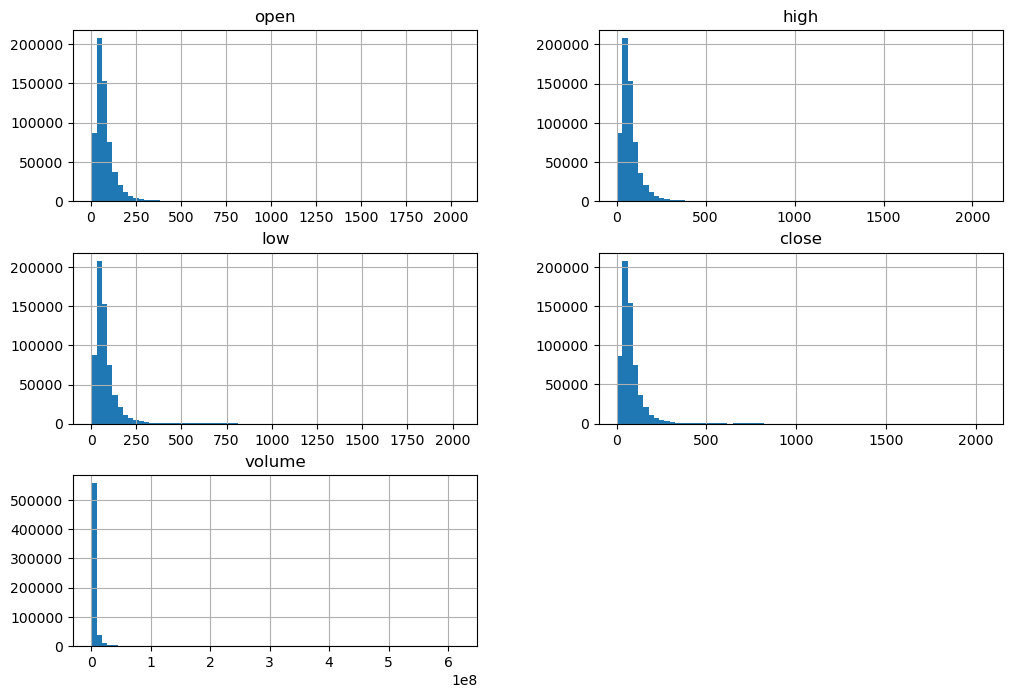

In [38]:
hist = df.hist(bins=70,figsize=(12,8)) 

In [39]:
df.low.mean()

82.25609641375566

In [40]:
df.high.mean()

83.77831069346986

In [41]:
print("The average of low vs average of high is ", df.high.mean() - df.low.mean())

The average of low vs average of high is  1.5222142797142055


This low of a number is a bit intresting since it shows how little change there is a day to day bases for stocks avergly

# Comparing Opening to closing price

In [42]:
df.open.mean()

83.02333431454747

In [43]:
df.close.mean()

83.04376276476482

This is expected that the closing price is higher as the stock prices on average grow over time

# Adding four columns for Exploratory reasons

In [44]:
df["Max_Margin"] =  df["high"] - df["low"]
df["Day_Margin"] = df["close"]  - df["open"]
df

,date,open,high,low,close,volume,Name,Max_Margin,Day_Margin
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,0.49,-0.32
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,0.75,-0.43
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,0.41,-0.18
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.69,0.36
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,1.80,-0.95
...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,1.58,0.98
1255,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,1.39,-0.75
1256,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,3.74,-2.81
1257,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2.43,0.53


In [45]:
df["ROI_Max"] =  (df["high"] / df["low"] - 1)
df["Day_ROI"] = (df["close"] / df["open"] - 1)

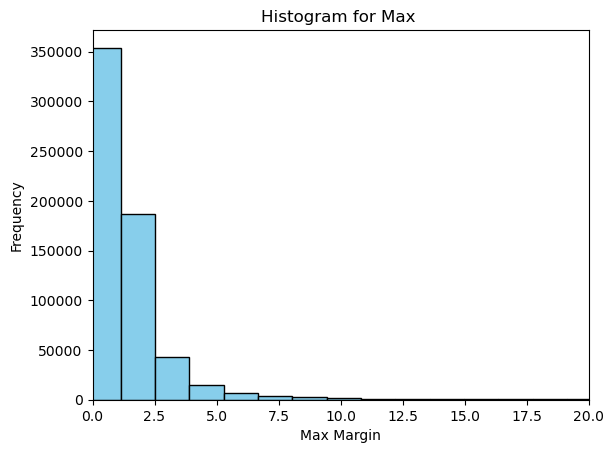

In [46]:
import matplotlib.pyplot as plt

plt.xlabel('Max Margin')
plt.ylabel('Frequency')
plt.title('Histogram for Max ')
plt.xlim(0, 20)

plt.hist(df["Max_Margin"], bins=100, color='skyblue', edgecolor='black')
plt.show()


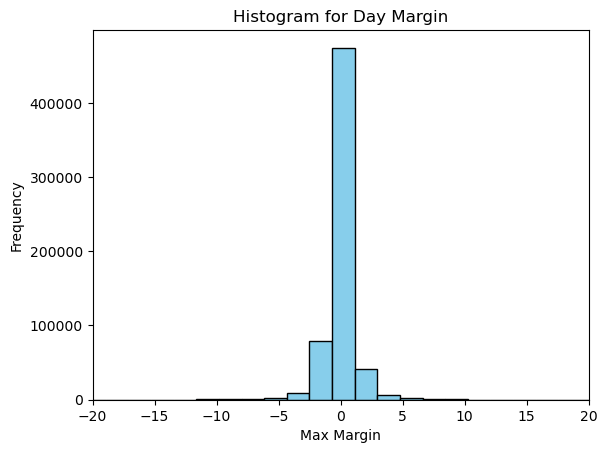

In [47]:
import matplotlib.pyplot as plt

plt.xlabel('Max Margin')
plt.ylabel('Frequency')
plt.title('Histogram for Day Margin')
plt.xlim(-20, 20)

plt.hist(df["Day_Margin"], bins=100, color='skyblue', edgecolor='black')
plt.show()

In [48]:
print(df["Max_Margin"].mean())
print(df["Day_Margin"].mean())

1.522214279714134
0.019970664217669944


Max_margin would represent if you perfeclty timed the market vs buying at opening of a day and selling at closing. Though both methods on avg are still better than nothing is what this would mean

In [49]:
print("Max price is ", df["Max_Margin"].max())
print("Min price is ", df["Max_Margin"].min())

Max price is  138.26
Min price is  -0.25500000000000256


There is a issue with the data here it shouldn't be possible for Max_Margin to be below 0 since it's calculated by subtracting low from high.

In [50]:
print("Max price is ", df["Day_Margin"].max())
print("Min price is ", df["Day_Margin"].min())

Max price is  81.37999999999988
Min price is  -100.98000000000002


# Looking into possible ROI 

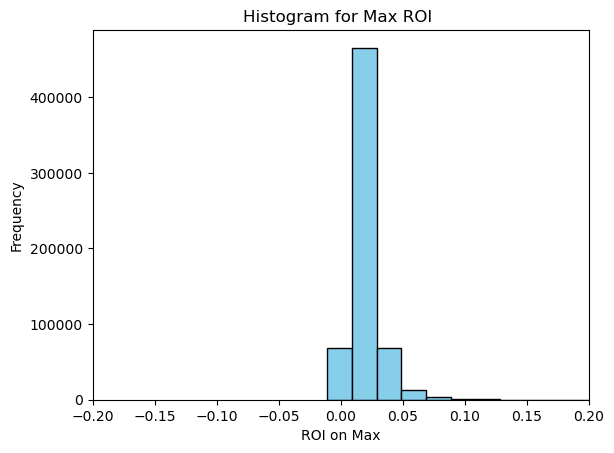

In [51]:
import matplotlib.pyplot as plt

plt.xlabel('ROI on Max')
plt.ylabel('Frequency')
plt.title('Histogram for Max ROI ')
plt.xlim(-.2, .2)

plt.hist(df["ROI_Max"], bins=300, color='skyblue', edgecolor='black')
plt.show()


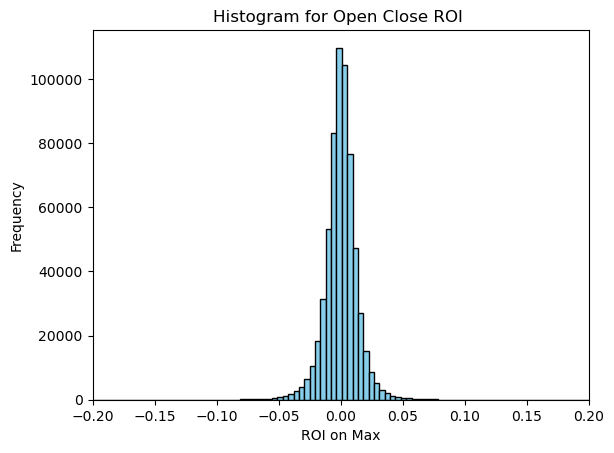

In [52]:
import matplotlib.pyplot as plt

plt.xlabel('ROI on Max')
plt.ylabel('Frequency')
plt.title('Histogram for Open Close ROI ')
plt.xlim(-.2, .2)

plt.hist(df["Day_ROI"], bins=300, color='skyblue', edgecolor='black')
plt.show()

# Correlation

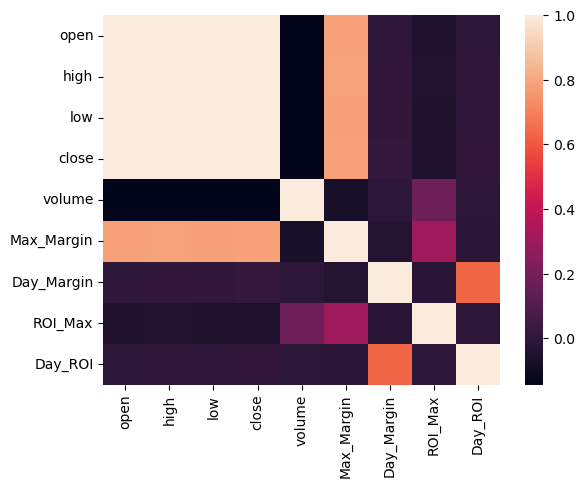

In [53]:
import seaborn as sns
sns.heatmap(df[["open","high","low","close","volume","Max_Margin","Day_Margin","ROI_Max","Day_ROI"]].corr());

The Fields that would be intresting to predict are Day_Margin, Day_ROI, Close, Low, High. Something intresting is Volume being a predicator for ROI. But most these fields have very low correlation for the ones we would know at infrence time. This would lead to the assumation that doing classifaction may not be possible though viewing as time series regression may be the best approach. 

# Cleaning and Transformation

In [54]:
df.isna().any()

date          False
open           True
high           True
low            True
close         False
volume        False
Name          False
Max_Margin     True
Day_Margin     True
ROI_Max        True
Day_ROI        True
dtype: bool

Let's see how many nulls there are

In [55]:
len(df)

619040

In [56]:
df.dropna(subset=['open', "high","low", "close"], inplace=True)
df.isna().any()

date          False
open          False
high          False
low           False
close         False
volume        False
Name          False
Max_Margin    False
Day_Margin    False
ROI_Max       False
Day_ROI       False
dtype: bool

In [57]:
len(df)

619029

Since it's only 11 datapooints in the 619 thousand it's safe to just drop those 11.

# One hot encode Name

In [58]:
df['date'] = pd.to_datetime(df['date'])

df['unix_time'] = df['date'].astype('int64') // 10**9

In [59]:
df

,date,open,high,low,close,volume,Name,Max_Margin,Day_Margin,ROI_Max,Day_ROI,unix_time
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,0.49,-0.32,0.033493,-0.021234,1360281600
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,0.75,-0.43,0.052595,-0.028878,1360540800
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,0.41,-0.18,0.029078,-0.012457,1360627200
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.69,0.36,0.048421,0.025175,1360713600
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,1.80,-0.95,0.136778,-0.063588,1360800000
...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,1.58,0.98,0.020602,0.012754,1517443200
1255,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,1.39,-0.75,0.018115,-0.009674,1517529600
1256,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,3.74,-2.81,0.051107,-0.036665,1517788800
1257,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2.43,0.53,0.033689,0.007286,1517875200


In [60]:
df = df.drop(columns=['date'])

In [63]:
df = pd.get_dummies(df)

In [64]:
df

,open,high,low,close,volume,Max_Margin,Day_Margin,ROI_Max,Day_ROI,unix_time,...,Name_XL,Name_XLNX,Name_XOM,Name_XRAY,Name_XRX,Name_XYL,Name_YUM,Name_ZBH,Name_ZION,Name_ZTS
0,15.07,15.12,14.63,14.75,8407500,0.49,-0.32,0.033493,-0.021234,1360281600,...,False,False,False,False,False,False,False,False,False,False
1,14.89,15.01,14.26,14.46,8882000,0.75,-0.43,0.052595,-0.028878,1360540800,...,False,False,False,False,False,False,False,False,False,False
2,14.45,14.51,14.10,14.27,8126000,0.41,-0.18,0.029078,-0.012457,1360627200,...,False,False,False,False,False,False,False,False,False,False
3,14.30,14.94,14.25,14.66,10259500,0.69,0.36,0.048421,0.025175,1360713600,...,False,False,False,False,False,False,False,False,False,False
4,14.94,14.96,13.16,13.99,31879900,1.80,-0.95,0.136778,-0.063588,1360800000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,76.84,78.27,76.69,77.82,2982259,1.58,0.98,0.020602,0.012754,1517443200,...,False,False,False,False,False,False,False,False,False,True
1255,77.53,78.12,76.73,76.78,2595187,1.39,-0.75,0.018115,-0.009674,1517529600,...,False,False,False,False,False,False,False,False,False,True
1256,76.64,76.92,73.18,73.83,2962031,3.74,-2.81,0.051107,-0.036665,1517788800,...,False,False,False,False,False,False,False,False,False,True
1257,72.74,74.56,72.13,73.27,4924323,2.43,0.53,0.033689,0.007286,1517875200,...,False,False,False,False,False,False,False,False,False,True


# Example stock price over time

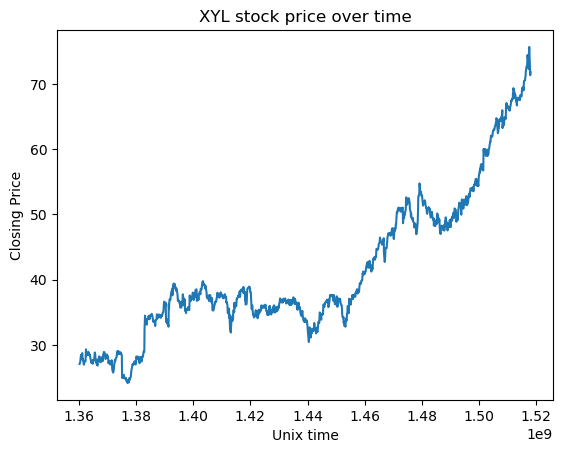

In [65]:
plt.xlabel('Unix time')
plt.ylabel('Closing Price')
plt.title('XYL stock price over time')

plt.plot(df[df["Name_XYL"] == True]["unix_time"],df[df["Name_XYL"] == True]["close"])

# Day ROI Over time

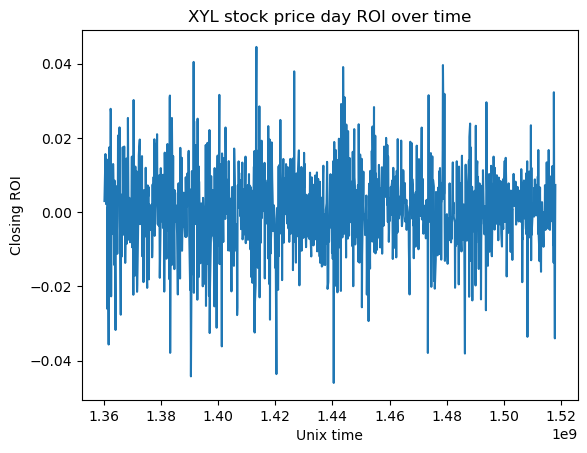

In [66]:
plt.xlabel('Unix time')
plt.ylabel('Closing ROI')
plt.title('XYL stock price day ROI over time')

plt.plot(df[df["Name_XYL"] == True]["unix_time"],df[df["Name_XYL"] == True]["Day_ROI"])

# Max ROI Over time

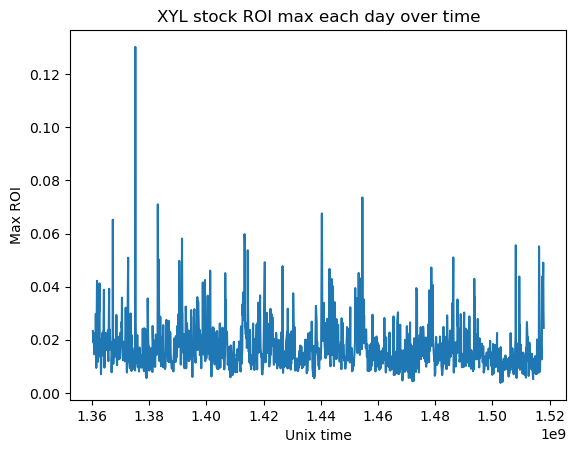

In [67]:
plt.xlabel('Unix time')
plt.ylabel('Max ROI')
plt.title('XYL stock ROI max each day over time')

plt.plot(df[df["Name_XYL"] == True]["unix_time"],df[df["Name_XYL"] == True]["ROI_Max"])

In [36]:
df.to_csv('Output.csv', index=False)  